In [12]:
from pathlib import Path
import itertools
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [13]:
class PokerHandDataset():
    def __init__(self, file):
        self.hands, self.labels = self.parse_csv(file)
       
    @staticmethod
    def parse_csv(file):
        df = pd.read_csv(file, header=None)
        xs = df[df.columns[0:10]]
        ys = df[df.columns[-1]]
        
        labels = np.array([label for label in ys])
        hands = np.array([PokerHandDataset.make_tensor(np.array(hand).reshape((5,2)) - 1) for hand in xs.values])
            
        return hands, ys
        
    @staticmethod
    def make_tensor(hand):
        hand_tensor = np.zeros((4,13)) - 1
        for card in hand: 
            hand_tensor[card[0], card[1]] = 1
        return hand_tensor.reshape(-1)
    
    @staticmethod
    def make_one_hot(label):
        tensor = torch.zeros(10)
        tensor[label] = 1
        return tensor
    
    def __len__(self): return len(self.hands)

    def __getitem__(self, i):
        hand, label = self.hands[i], self.labels[i]
        x, y = self.make_tensor(hand), self.make_one_hot(label)
        return x, y

In [14]:
data_path = Path("./Datasets/PokerHands")
train_dataset = PokerHandDataset(data_path/'training.csv')
test_dataset = PokerHandDataset(data_path/'testing.csv')

In [15]:
train_dataset.hands[0]

array([ 1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [16]:
import pylab

In [17]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(train_dataset.hands)

In [18]:
X_pca = np.array([point for point, lab in zip(X_pca, train_dataset.labels) if lab != 0])
labels = [lab for lab in train_dataset.labels if lab != 0]

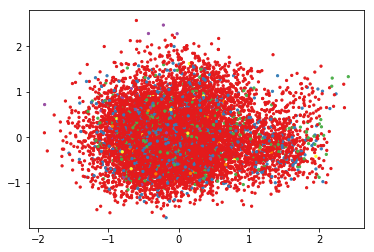

In [19]:
fig, ax = plt.subplots()

# Plot the values
ax.scatter(X_pca[:,0], X_pca[:,1], c=labels, s=5, cmap=plt.cm.get_cmap('Set1'))
# fig.savefig('pca.png', bbox_inches = "tight")

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_r2 = lda.fit(train_dataset.hands, train_dataset.labels).transform(train_dataset.hands)

/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


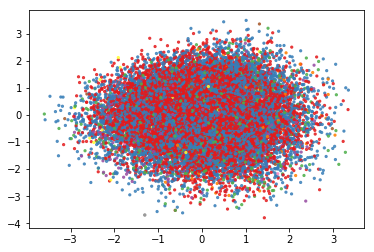

In [21]:
fig, ax = plt.subplots()

ax.scatter(X_r2[:,0], X_r2[:,1], c=train_dataset.labels, alpha=.8, s=5, cmap=plt.cm.get_cmap('Set1'))
# fig.savefig('ldm.png', bbox_inches = "tight")